<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-Agglomérativ" data-toc-modified-id="Clustering-Agglomérativ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering Agglomérativ</a></span></li></ul></div>

In [1]:
%matplotlib inline


#  Clustering Agglomérativ


Une illustration de diverses options de clustering agglomérative sur l'ensemble de données de chiffres.
Le but de cet exemple est de montrer intuitivement comment les métriques se comportent, et non de trouver de bons clusters pour les chiffres. 


In [1]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)

In [5]:
digits.data.shape

(1797, 64)

Computing embedding
Done.
ward : 0.31s
average : 0.28s
complete : 0.28s


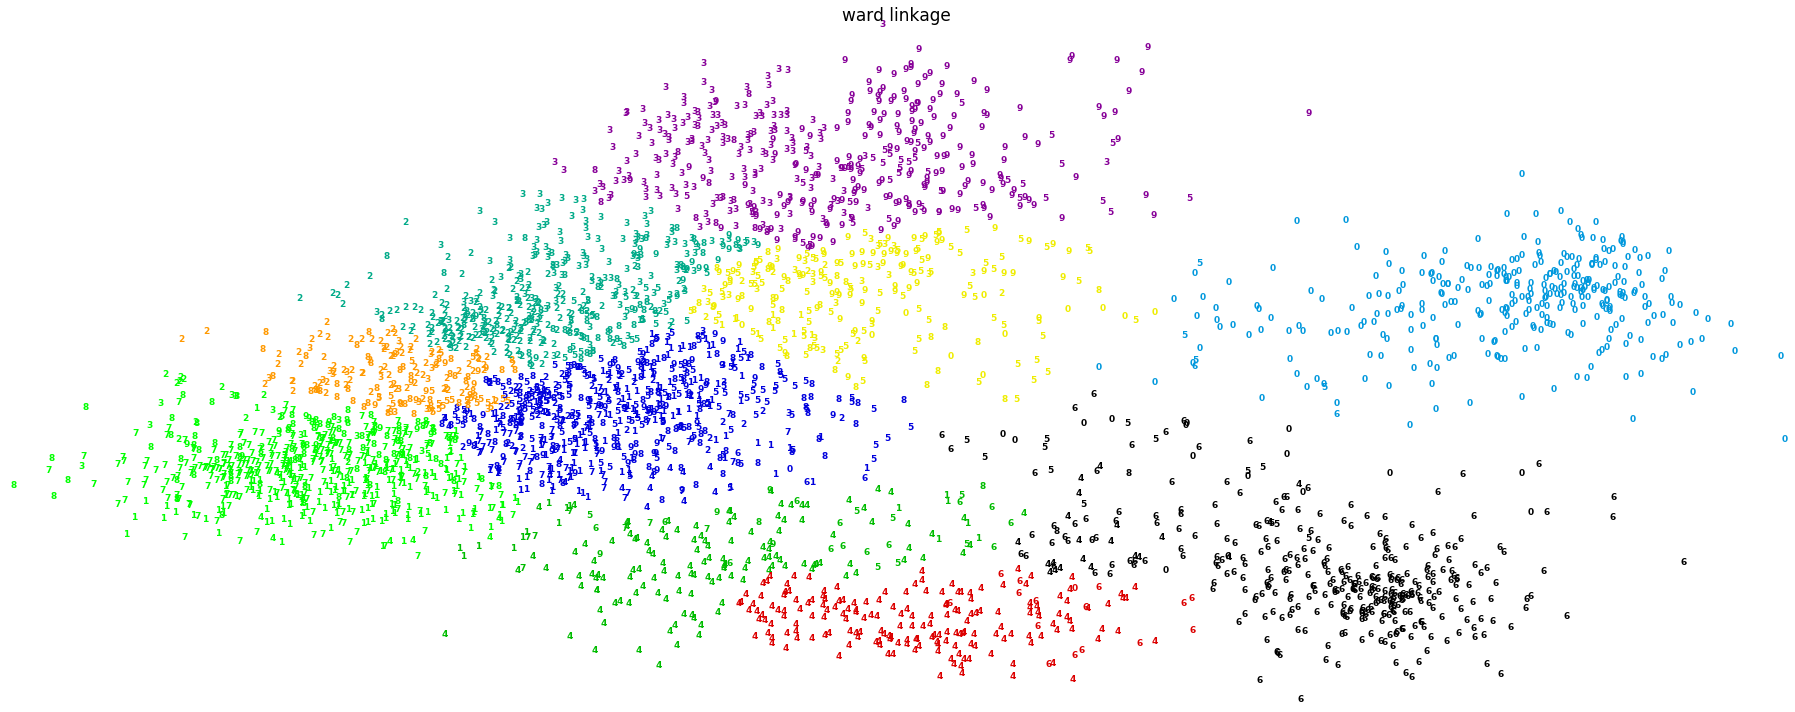

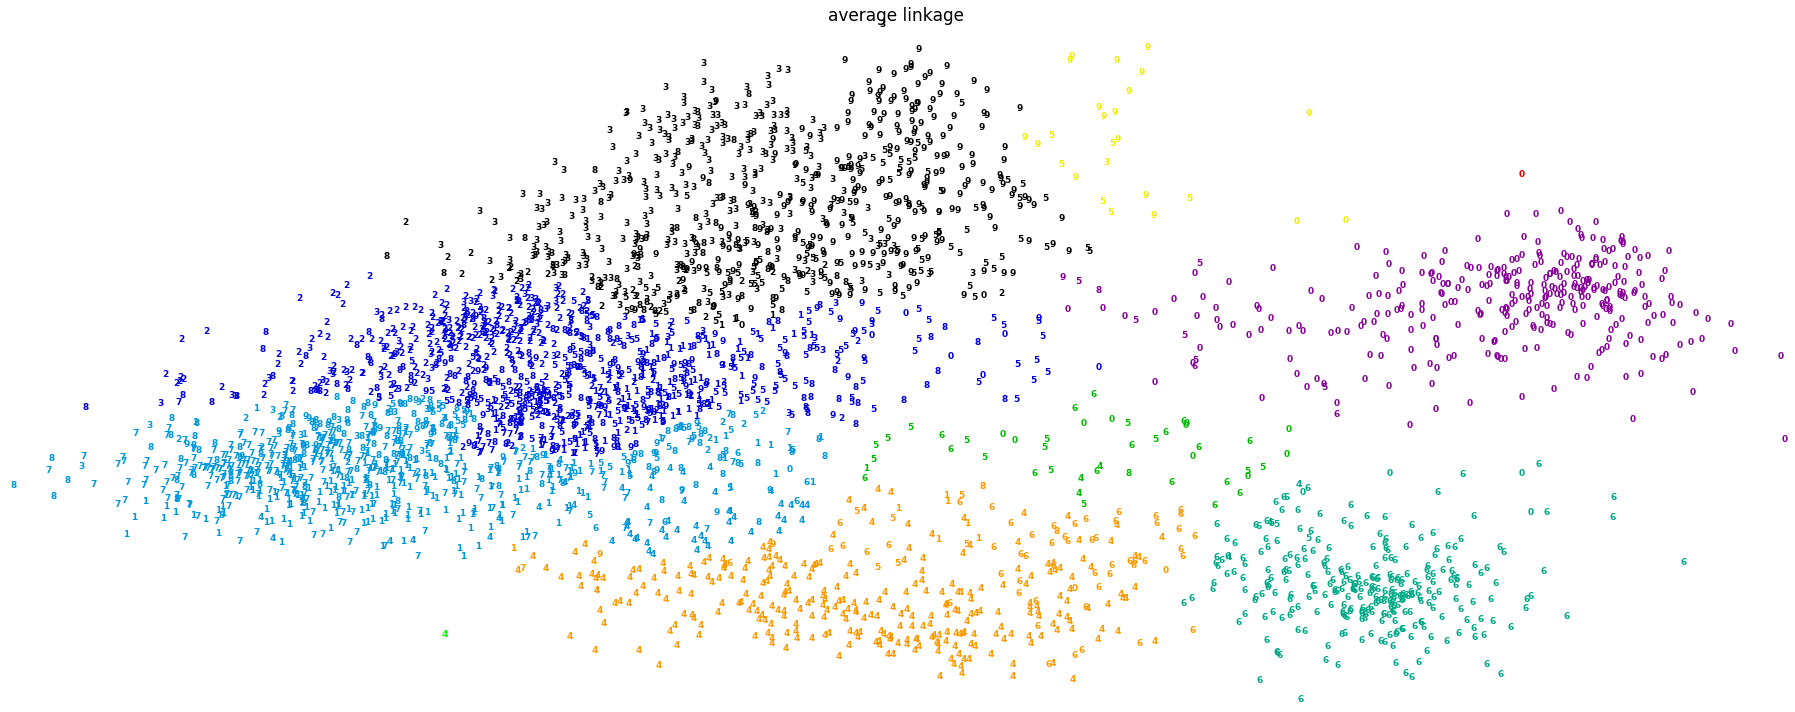

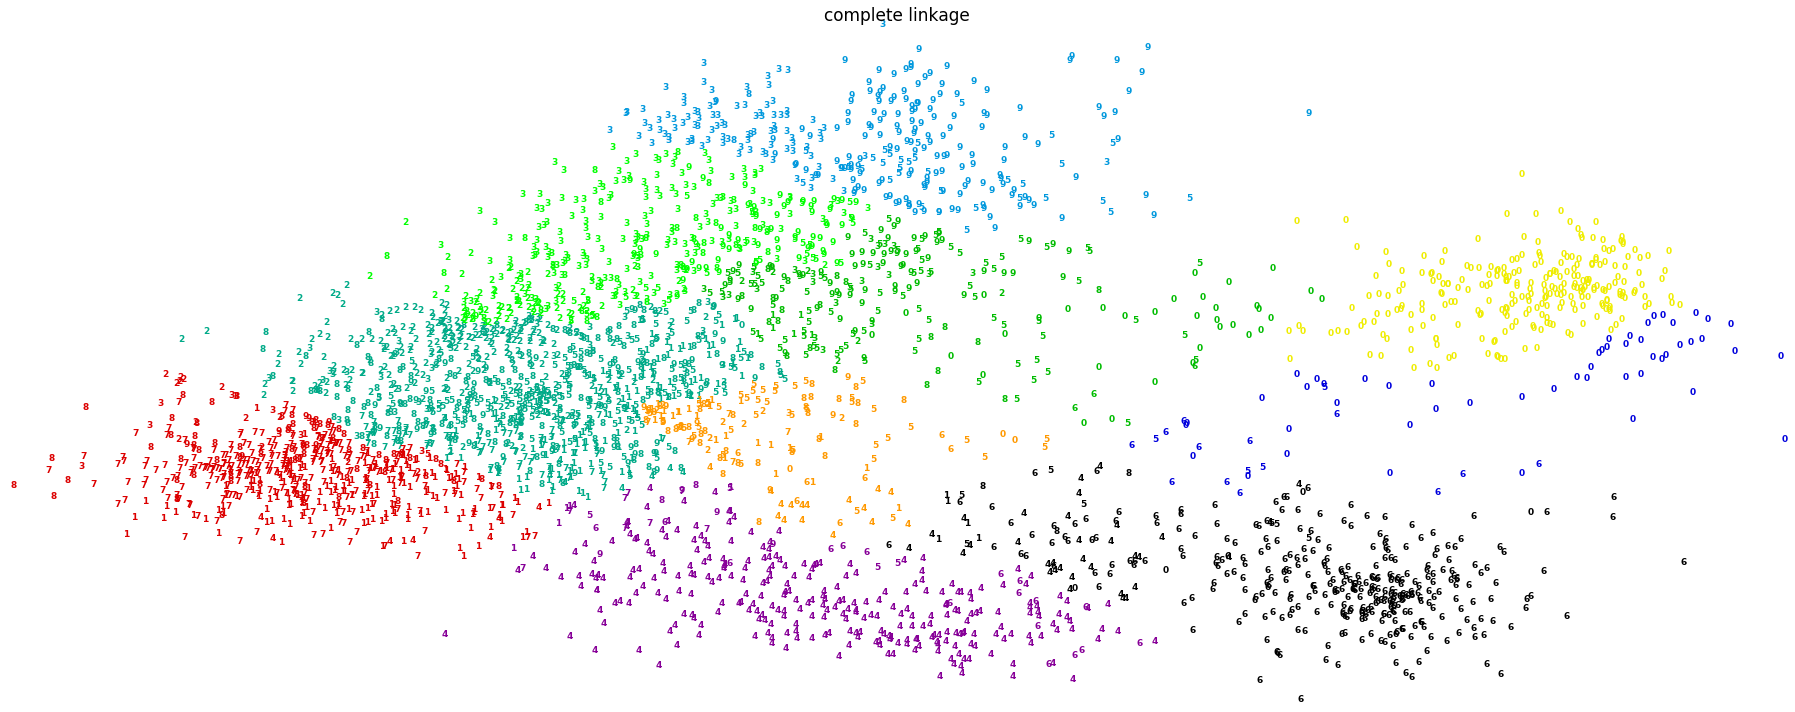

In [2]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(25, 10))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 #color=plt.cm.spectral(labels[i] / 10.),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

ward : 0.66s


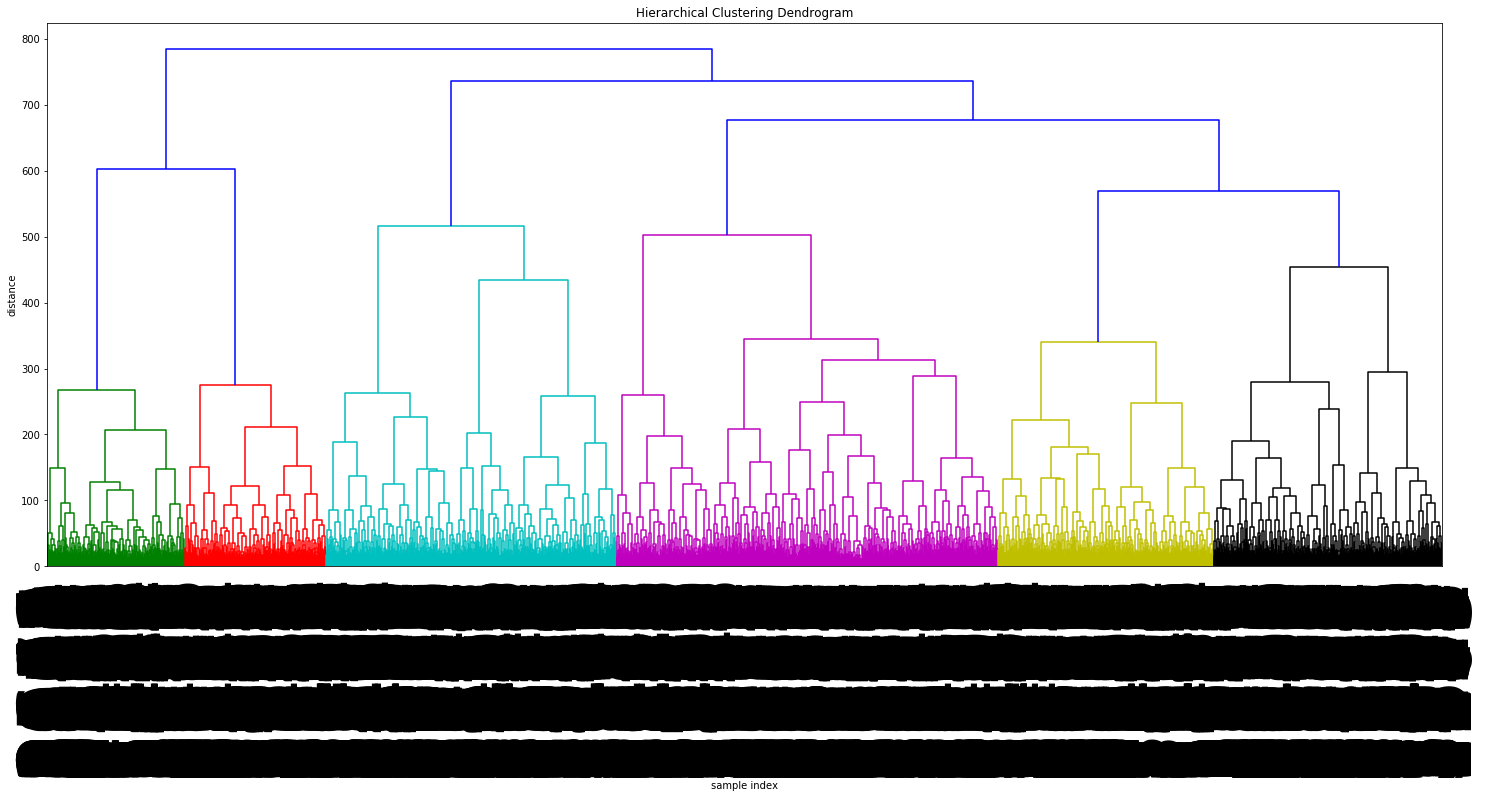

average : 0.56s


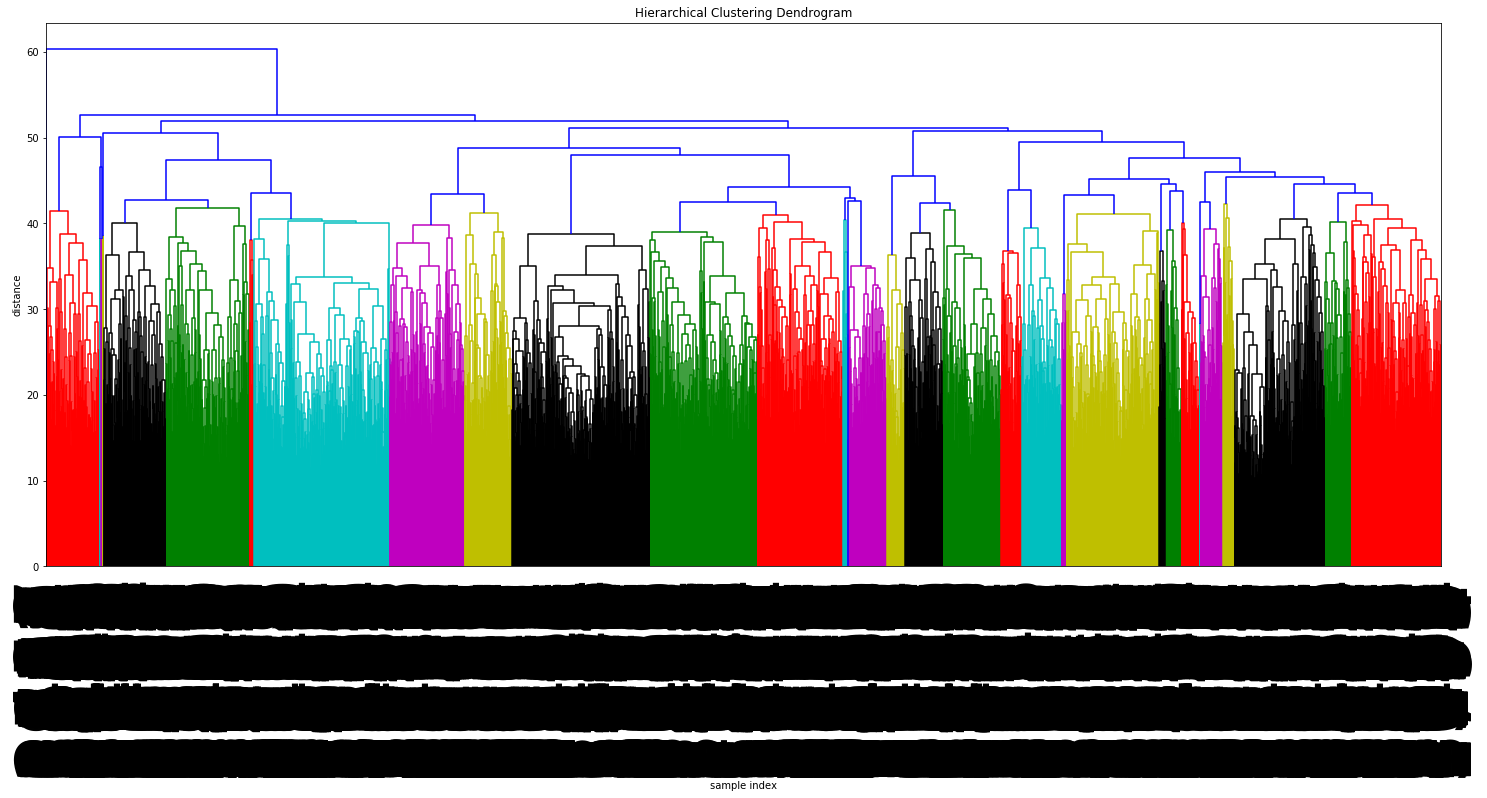

complete : 0.59s


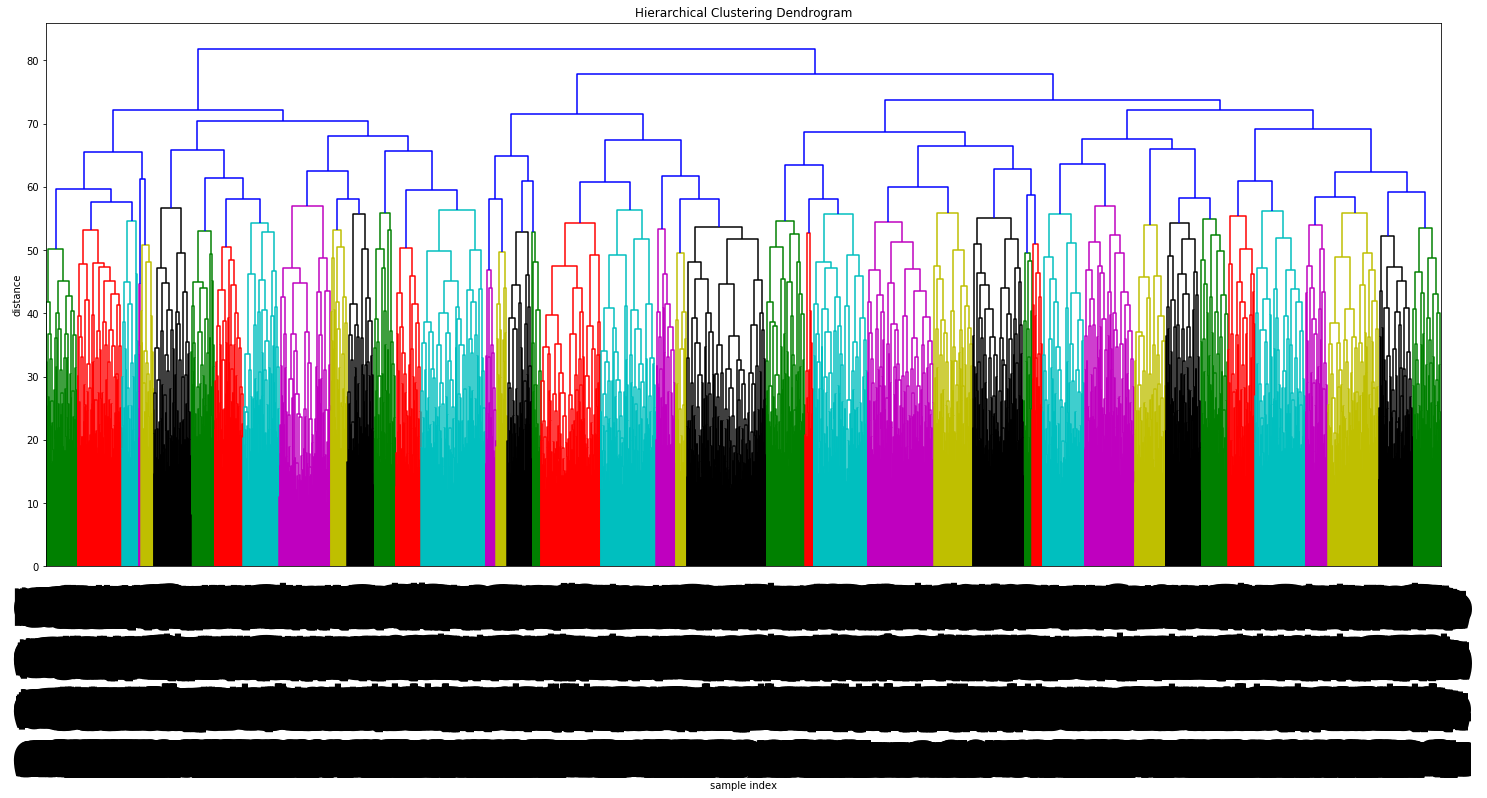

In [3]:
np.random.seed(256)
from scipy.cluster.hierarchy import dendrogram, linkage
#for linkage in ('ward', 'average', 'complete'):
    
for methode in ('ward', 'average', 'complete'):
    t0 = time()
    Z = linkage(X, methode)
    print("%s : %.2fs" % (methode, time() - t0))
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram( Z,leaf_rotation=90.,leaf_font_size=80.)
    plt.show()

In [4]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

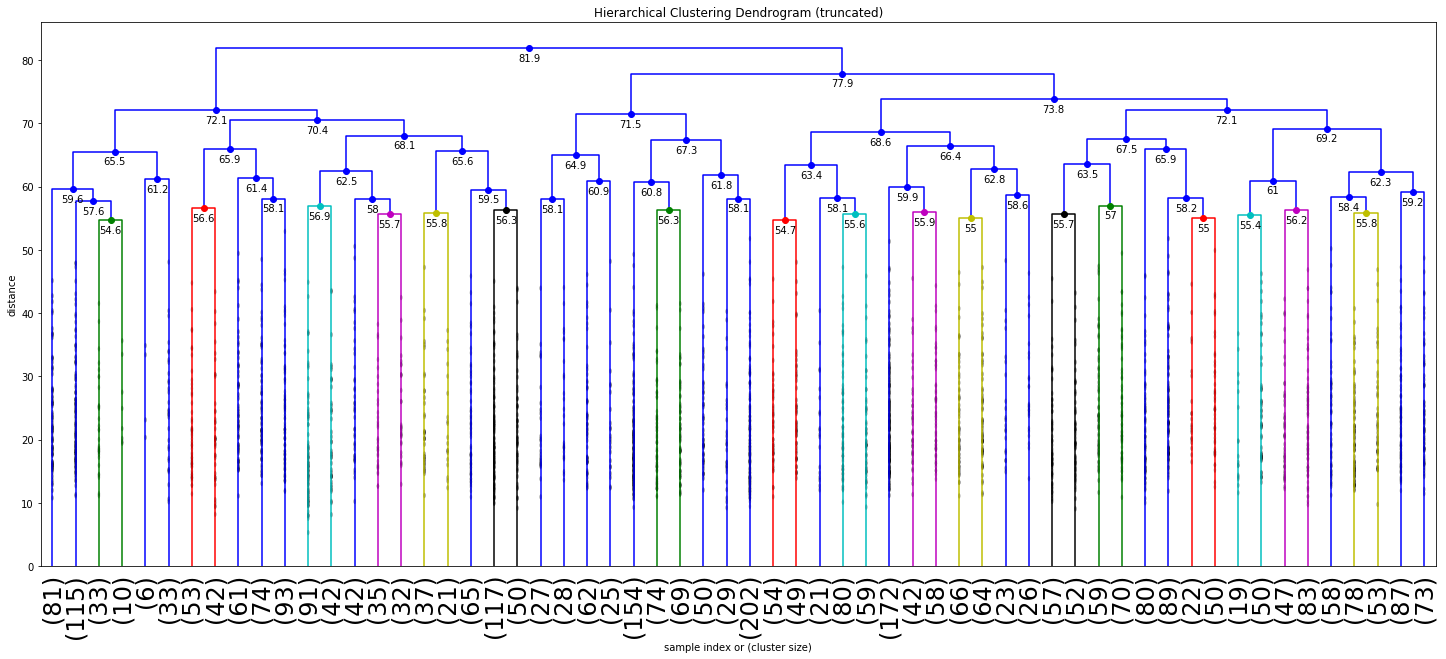

In [5]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=60,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # utile dans les petits graphiques de sorte que les annotations ne se chevauchent pas
)
plt.show()

ward : 0.61s


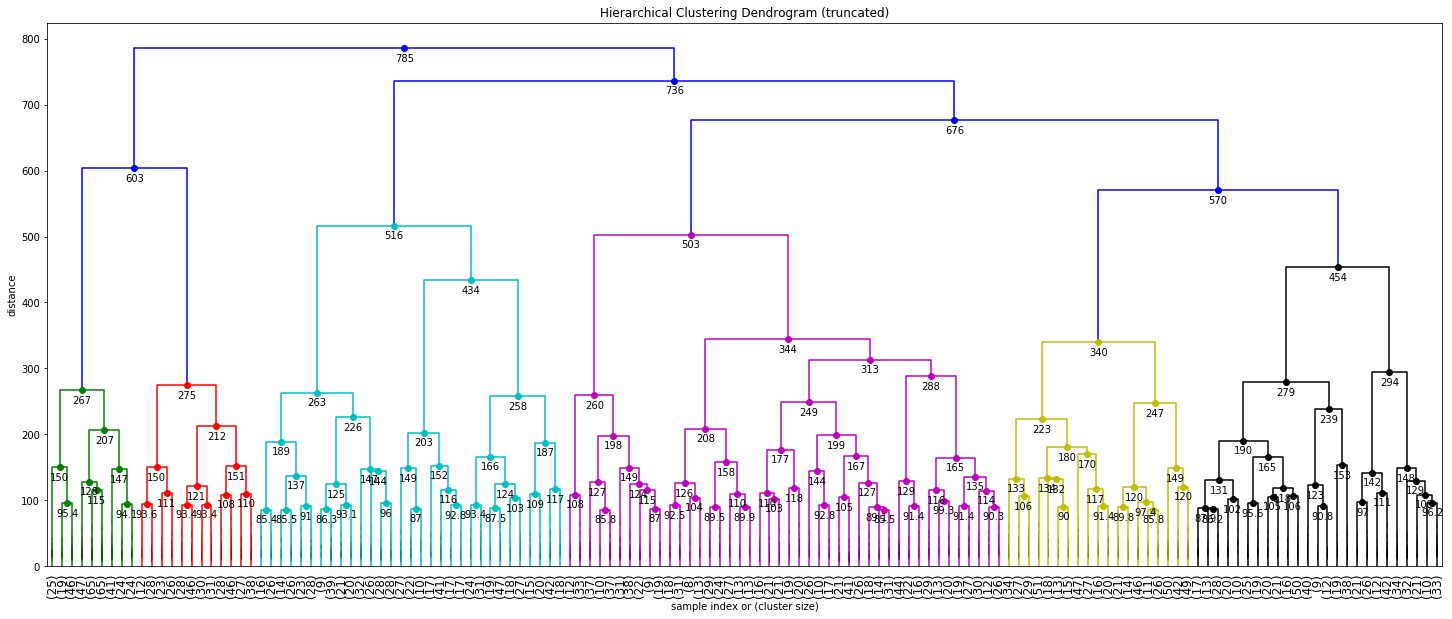

average : 0.58s


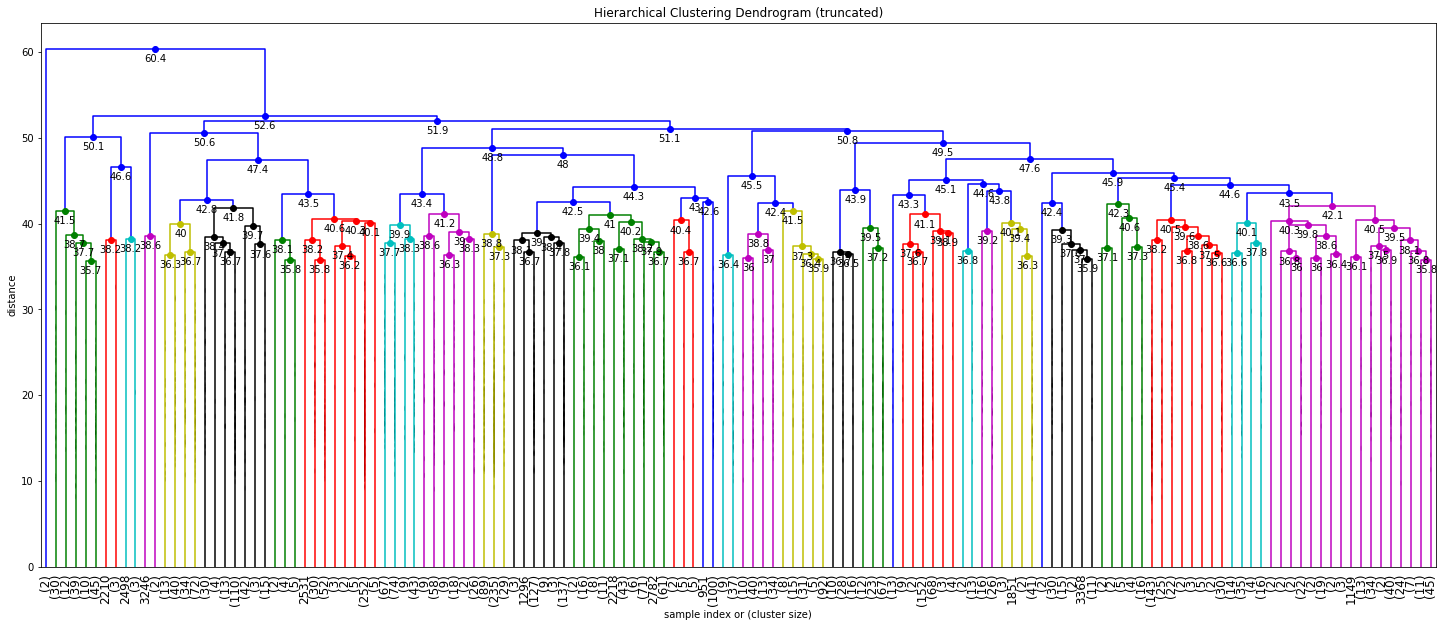

complete : 0.62s


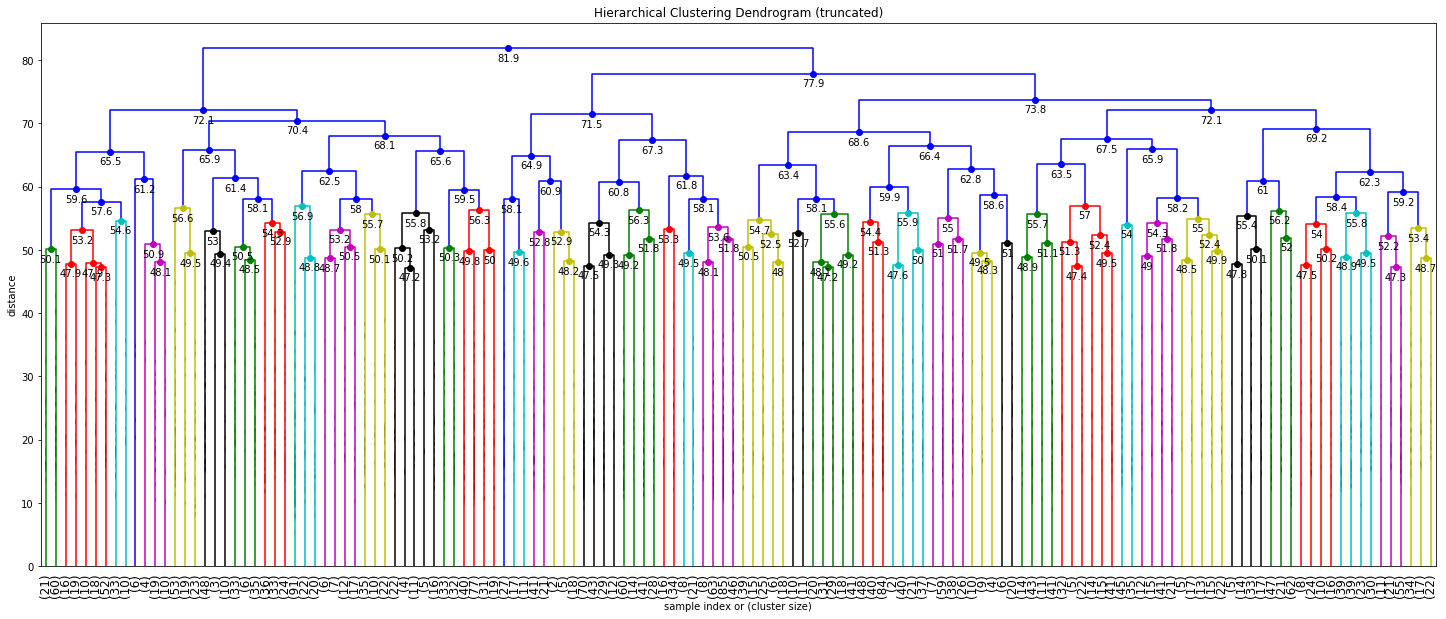

In [6]:
np.random.seed(256)
from scipy.cluster.hierarchy import dendrogram, linkage
#for linkage in ('ward', 'average', 'complete'):
    
for methode in ('ward', 'average', 'complete'):
    t0 = time()
    Z = linkage(X, methode)
    print("%s : %.2fs" % (methode, time() - t0))
    plt.figure(figsize=(25, 10))
    afficheDendrogram(
        Z,
        truncate_mode='lastp',
        p=140,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # utile dans les petits graphiques de sorte que les annotations ne se chevauchent pas
    )
    plt.show()

ward : 0.62s


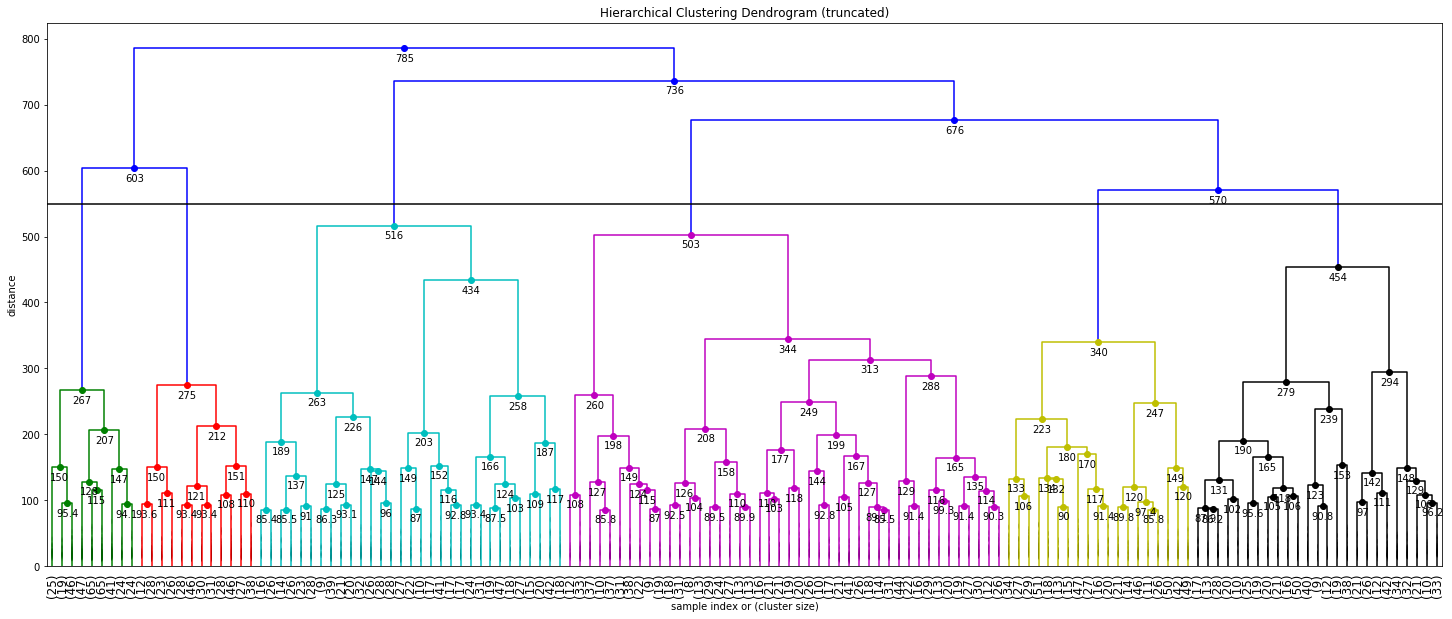

average : 0.58s


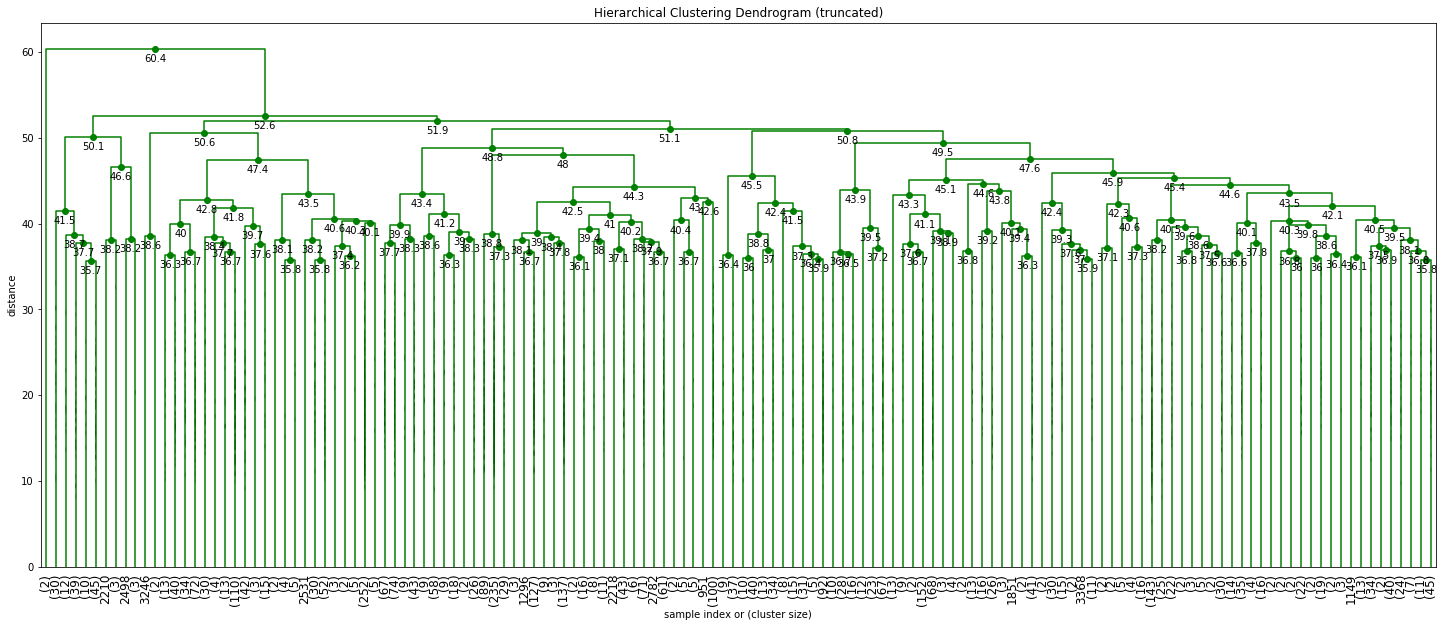

complete : 0.61s


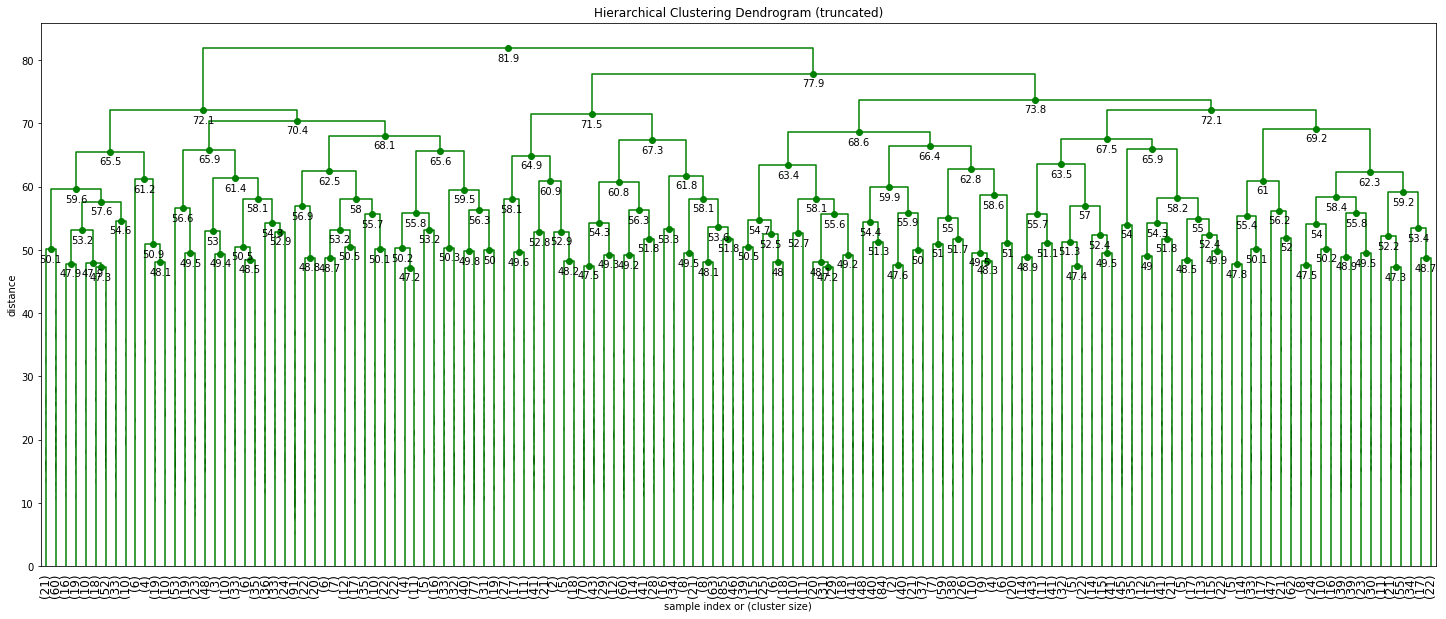

In [7]:
np.random.seed(256)
from scipy.cluster.hierarchy import dendrogram, linkage
#for linkage in ('ward', 'average', 'complete'):
    
for methode in ('ward', 'average', 'complete'):
    t0 = time()
    Z = linkage(X, methode)
    print("%s : %.2fs" % (methode, time() - t0))
    plt.figure(figsize=(25, 10))
    afficheDendrogram(
        Z,
        truncate_mode='lastp',
        p=140,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # utile dans les petits graphiques de sorte que les annotations ne se chevauchent pas
        max_d = 550,
    )
    plt.show()